In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
aq_data=pd.read_csv('Beijing_17_18_aq.csv')
meo_data=pd.read_csv('Beijing_historical_meo_grid.csv')
station_data=pd.read_excel('Beijing_AirQuality_Stations.xlsx')

In [3]:
knn = KNeighborsClassifier(n_neighbors=1)
train=station_data[['longitude','latitude']]
y=station_data[['Station ID']]
test=meo_data[['longitude','latitude']]
knn.fit(train,y)
test1=knn.predict(test)
meo_data['station']=test1
aq_cd1=aq_data.query('stationId=="fangshan_aq"')
cd1=meo_data.query('station=="fangshan_aq"')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [4]:
cd1.head()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph,station
218,beijing_grid_218,116.0,39.8,2017-01-01 00:00:00,-5.71,994.86,75.01,8.60,1.43,fangshan_aq
238,beijing_grid_238,116.1,39.7,2017-01-01 00:00:00,-5.38,1014.48,76.42,97.58,2.16,fangshan_aq
259,beijing_grid_259,116.2,39.7,2017-01-01 00:00:00,-5.25,1019.46,75.43,107.28,3.56,fangshan_aq
869,beijing_grid_218,116.0,39.8,2017-01-01 01:00:00,-2.95,994.79,61.54,2.43,1.17,fangshan_aq
889,beijing_grid_238,116.1,39.7,2017-01-01 01:00:00,-2.81,1014.42,63.74,102.65,2.08,fangshan_aq


In [5]:
def cust_mean(grp):
    grp['wind_direction'] = grp['wind_direction'].mean()
    grp['temperature'] = grp['temperature'].mean()
    grp['pressure'] = grp['pressure'].mean()
    grp['humidity'] = grp['humidity'].mean()
    grp['wind_speed/kph'] = grp['wind_speed/kph'].mean()
    
    return grp
cd1=cd1.groupby(['utc_time']).apply(cust_mean)
cd1=cd1.drop_duplicates(subset=['utc_time'], keep='first')

In [6]:
cd1.head()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph,station
218,beijing_grid_218,116.0,39.8,2017-01-01 00:00:00,-5.446667,1009.600000,75.620000,71.153333,2.383333,fangshan_aq
869,beijing_grid_218,116.0,39.8,2017-01-01 01:00:00,-2.863333,1009.536667,62.993333,71.606667,2.216667,fangshan_aq
1520,beijing_grid_218,116.0,39.8,2017-01-01 02:00:00,-0.280000,1009.470000,50.373333,191.156667,2.066667,fangshan_aq
2171,beijing_grid_218,116.0,39.8,2017-01-01 03:00:00,2.303333,1009.406667,37.753333,188.993333,1.936667,fangshan_aq
2822,beijing_grid_218,116.0,39.8,2017-01-01 04:00:00,3.336667,1008.760000,35.373333,125.973333,2.133333,fangshan_aq


In [7]:
cd1['time']=pd.to_datetime(cd1.utc_time,  utc=True)
aq_cd1['time']=pd.to_datetime(aq_cd1.utc_time,  utc=True)
cd_final=pd.merge(cd1, aq_cd1, on="time")
cd_final=cd_final.drop(cd_final.columns[[-1,-2,-3,0, 1, 2,3,9,11,12]], axis=1) 
cd_final['time'] = pd.to_datetime(cd_final['time'])
cd_final.set_index('time', inplace=True)
cd_final.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,temperature,pressure,humidity,wind_direction,wind_speed/kph,PM2.5,PM10,NO2
time,,,,,,,,
2017-01-01 14:00:00+00:00,-1.880000,1008.160000,53.306667,299.916667,4.586667,399.0,472.0,136.0
2017-01-01 15:00:00+00:00,-1.916667,1008.343333,53.683333,313.940000,5.576667,397.0,485.0,126.0
2017-01-01 16:00:00+00:00,-1.933333,1008.463333,51.910000,323.020000,6.423333,429.0,520.0,124.0
2017-01-01 17:00:00+00:00,-1.953333,1008.586667,50.133333,329.210000,7.396667,441.0,505.0,127.0
2017-01-01 18:00:00+00:00,-1.973333,1008.710000,48.356667,333.606667,8.436667,438.0,485.0,127.0


Text(0.5,0,'Date')

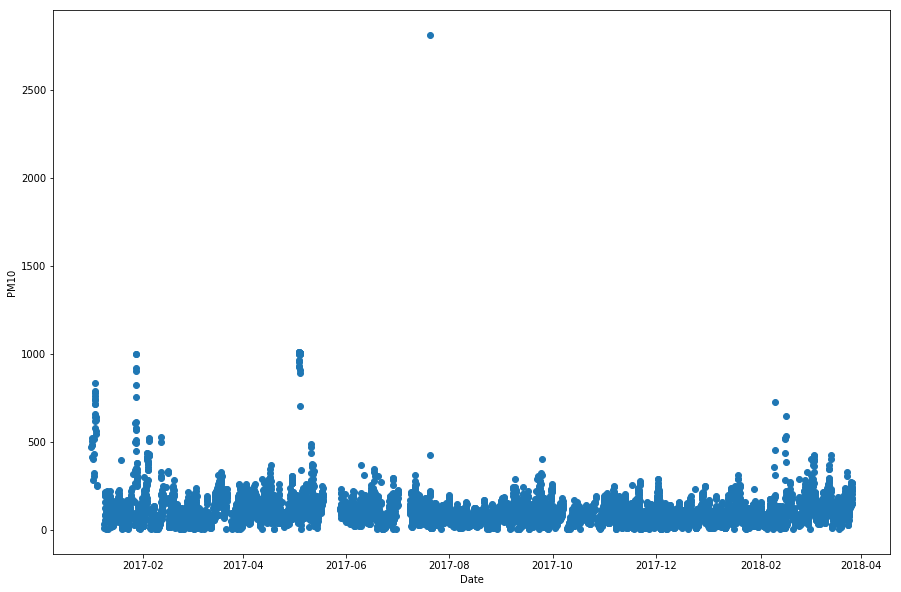

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(cd_final.index, cd_final['PM10'])
plt.ylabel(cd_final.columns[-2])
plt.xlabel('Date' )

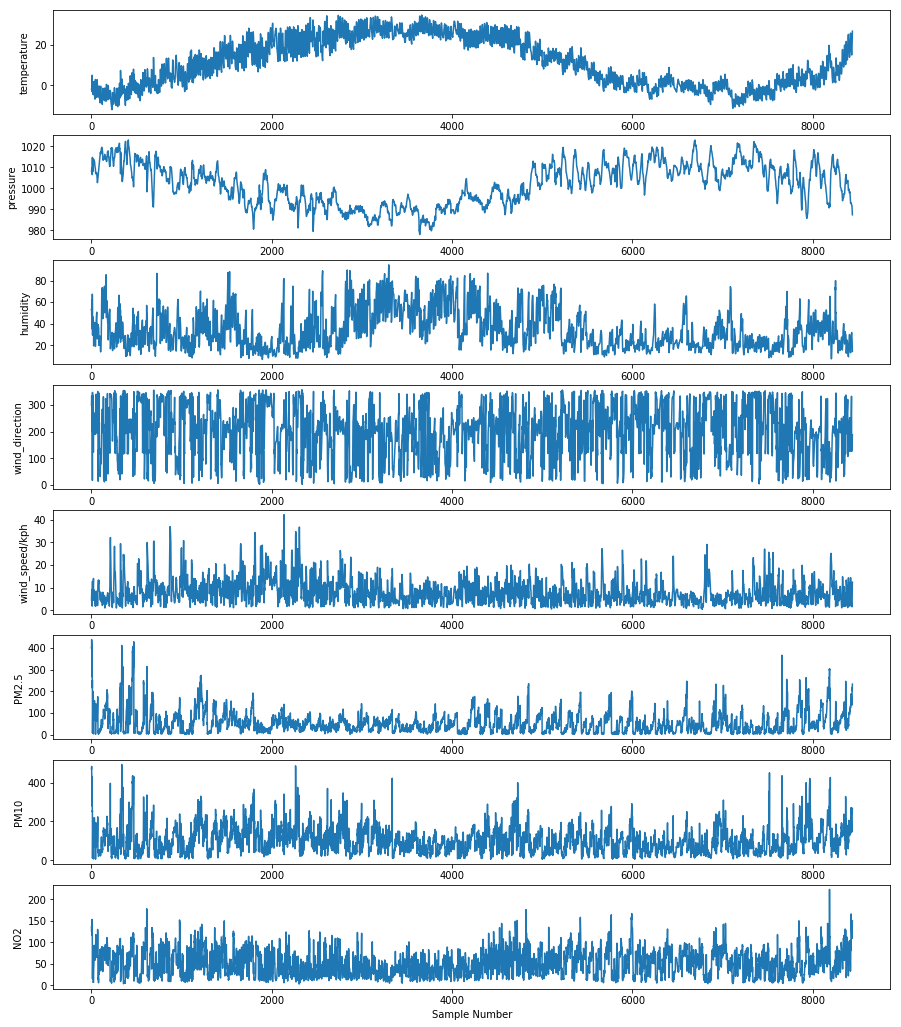

In [9]:
#Keep only the rows with at least 6 non-na values
cd_final=cd_final.dropna(thresh=6)
cd_final=cd_final[cd_final['PM2.5']<500]
cd_final=cd_final[cd_final['PM10']<500]
values = cd_final.values
# specify columns to plot
groups = [ 0,1,2,3,4,5,6,7]
i = 1
# plot each column
plt.figure(figsize=(15,18))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.ylabel(cd_final.columns[group])
    plt.xlabel('Sample Number' )
    i += 1
plt.show()

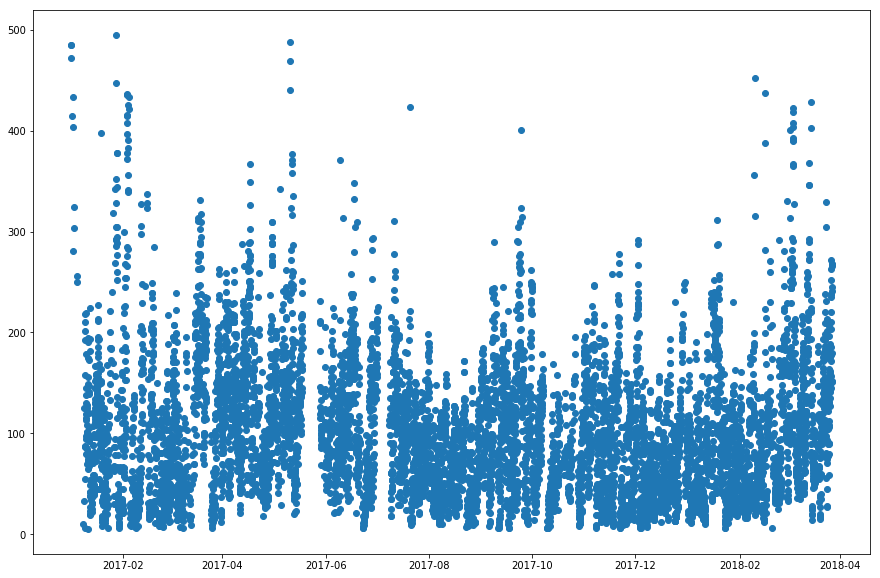

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(cd_final.index, cd_final['PM10'])

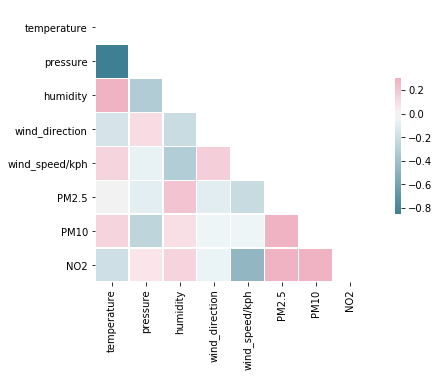

In [11]:
corrmat = cd_final.corr()
f, ax = plt.subplots(figsize=(10, 5))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 1, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
cd_final.isnull().sum()

temperature        0
pressure           0
humidity           0
wind_direction     0
wind_speed/kph     0
PM2.5              0
PM10               0
NO2               14
dtype: int64

In [13]:
#cd_final=cd_final.dropna(axis=0, how='any')
cd_final=cd_final.fillna(method='ffill')
cd_final.isnull().sum()
cd_final.iloc[:,0:5]=cd_final.iloc[:,0:5].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
cd_final.head()

,temperature,pressure,humidity,wind_direction,wind_speed/kph,PM2.5,PM10,NO2
time,,,,,,,,
2017-01-01 14:00:00+00:00,-0.278419,0.136278,0.210122,0.274843,-0.085349,399.0,472.0,136.0
2017-01-01 15:00:00+00:00,-0.279200,0.140354,0.214408,0.314243,-0.061718,397.0,485.0,126.0
2017-01-01 18:00:00+00:00,-0.280406,0.148505,0.153795,0.369498,0.006551,438.0,485.0,127.0
2017-01-01 20:00:00+00:00,-0.291827,0.159620,0.164871,0.351648,0.006790,409.0,415.0,120.0
2017-01-02 12:00:00+00:00,-0.268842,0.167475,0.258597,0.099674,0.016974,267.0,281.0,127.0


In [14]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 23, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset

values = cd_final.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

reframed = series_to_supervised(values, 29, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.shape



(8413, 56)

In [15]:
values = reframed.values
n_train_hours = len(reframed)-24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-8], train[:, -3:]
test_X, test_y = test[:, :-8], test[:, -3:]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(train_X, train_y)
print(lr.score(train_X, train_y))
print(lr.score(test_X, test_y))
lr_predict=lr.predict(test_X)

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10).fit(train_X, train_y)
print(knn.score(train_X, train_y))
print(knn.score(test_X, test_y))
knn_predict=knn.predict(test_X)

from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(solver='lbfgs', hidden_layer_sizes=[300,150,100], random_state=0).fit(train_X,train_y)
print(mlp.score(train_X, train_y))
print(mlp.score(test_X, test_y))
mlp_predict=mlp.predict(test_X)
mlp_predict.shape

(8389, 48) (8389, 3) (24, 48) (24, 3)
0.10437396280975897
-4.1372880120222355
0.28967256529268576
-4.11736569020527
0.08292371022305067
-4.7302592182202385


(24, 3)

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 24*1-1, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset

values = cd_final.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

reframed = series_to_supervised(values, 24*1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.head()

values = reframed.values
n_train_hours = 8394
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-8], train[:, -3:]
test_X, test_y = test[:, :-8], test[:, -3:]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(train_X, train_y)
print(lr.score(train_X, train_y))
print(lr.score(test_X, test_y))
lr_predict=lr.predict(test_X)

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)
print(knn.score(train_X, train_y))
print(knn.score(test_X, test_y))
knn_predict=knn.predict(test_X)

from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(solver='lbfgs', hidden_layer_sizes=[100,100,100], random_state=0).fit(train_X,train_y)
print(mlp.score(train_X, train_y))
print(mlp.score(test_X, test_y))
mlp_predict=mlp.predict(test_X)
mlp_predict.shape

(8394, 8) (8394, 3) (24, 8) (24, 3)
0.08986870342286622
-4.449508247134488
0.44627833100819014
-4.566803903006634
0.08211703543260235
-4.245551318344807


(24, 3)

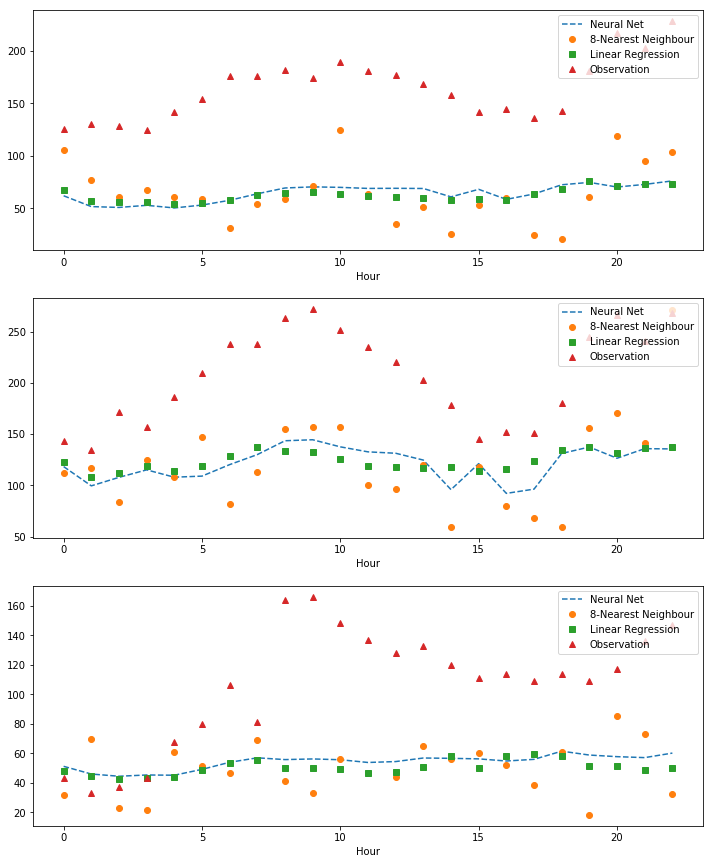

[[126. 143.  43.]
 [130. 135.  33.]
 [128. 172.  37.]
 [125. 157.  43.]
 [142. 186.  68.]
 [154. 210.  80.]
 [176. 238. 106.]
 [176. 238.  81.]
 [182. 263. 164.]
 [174. 272. 166.]
 [189. 252. 148.]
 [181. 235. 137.]
 [177. 220. 128.]
 [168. 203. 133.]
 [158. 178. 120.]
 [142. 145. 111.]
 [145. 152. 114.]
 [136. 151. 109.]
 [143. 180. 114.]
 [181. 245. 109.]
 [217. 266. 117.]
 [203. 241. 136.]
 [228. 268. 147.]
 [233. 268. 150.]]


In [17]:
groups = [0,1,2]
list1=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
i = 1
# plot each column
plt.figure(figsize=(12,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(mlp_predict[-25:-1,group], '--',label='Neural Net')
    plt.plot(knn_predict[-25:-1,group], 'o', label='8-Nearest Neighbour')
    plt.plot(lr_predict[-25:-1,group], 's', label='Linear Regression')
    plt.plot(test_y[-25:-1,group], '^', label='Observation')
    plt.xlabel('Hour')
    #plt.ylabel(list1[i-1])
    plt.legend(loc='upper right')
    
    i += 1
plt.show()
print(test_y)


In [18]:
values = reframed.values
n_train_hours =len(reframed)-24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :8], train[:, 13:]
test_X, test_y = test[:, :8], test[:, 13:]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


import tensorflow as tf 
df_train_X=pd.DataFrame(train_X,columns=['temperature', 'pressure', 'humidity', 'wind_direction',
       'wind_speed/kph', 'PM2.5', 'PM10', 'NO2'])
df_train_y=pd.DataFrame(train_y,columns=['PM2.5_Con','PM10_Con', 'NO2_Con'])
df_test_X=pd.DataFrame(test_X,columns=['temperature', 'pressure', 'humidity', 'wind_direction',
       'wind_speed/kph', 'PM2.5', 'PM10', 'NO2'])
df_test_y=pd.DataFrame(test_y,columns=['PM2.5_Con','PM10_Con', 'NO2_Con'])
LABELS=['PM2.5_Con', 'PM10_Con', 'NO2_Con']
df_train=pd.concat([df_train_X,df_train_y],axis=1)
df_test=pd.concat([df_test_X,df_test_y],axis=1)
col_train = list(df_train_X.columns)
col_train_bis = list(df_train_X.columns)


COLUMNS = col_train
FEATURES = col_train_bis

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

training_set = df_train
testing_set = df_test
prediction_set = df_train_y

#p3_100,p4_100,p3_200 = [[0]*24]*3
prediction3_100,prediction4_100,prediction3_200=(),(),()
# Model Hidden Layer: 100,100,100

for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[100,100,100])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    y = regressor.predict(input_fn=lambda: input_fn(testing_set))
    a=list(itertools.islice(y, testing_set.shape[0]))
    prediction3_100+=(a,)
    
    
# Model Hidden Layer: 100,100,100,100


for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[100,100,100,100])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    y = regressor.predict(input_fn=lambda: input_fn(testing_set))
    a=(list(itertools.islice(y, testing_set.shape[0])))
    prediction4_100+=(a,)
    
# Model Hidden Layer: 200,200,200

for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[200,200,200])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    a=(list(itertools.islice(y, testing_set.shape[0])))
    prediction3_200+=(a,)

(8394, 8) (8394, 3) (24, 8) (24, 3)


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Final Loss on the testing set: 11732.687500
Final Loss on the testing set: 8208.399414
Final Loss on the testing set: 5266.117188
Final Loss on the testing set: 8827.521484
Final Loss on the testing set: 6605.296387
Final Loss on the testing set: 3674.473389
Final Loss on the testing set: 12807.440430
Final Loss on the testing set: 9503.971680
Final Loss on the testing set: 3542.462646


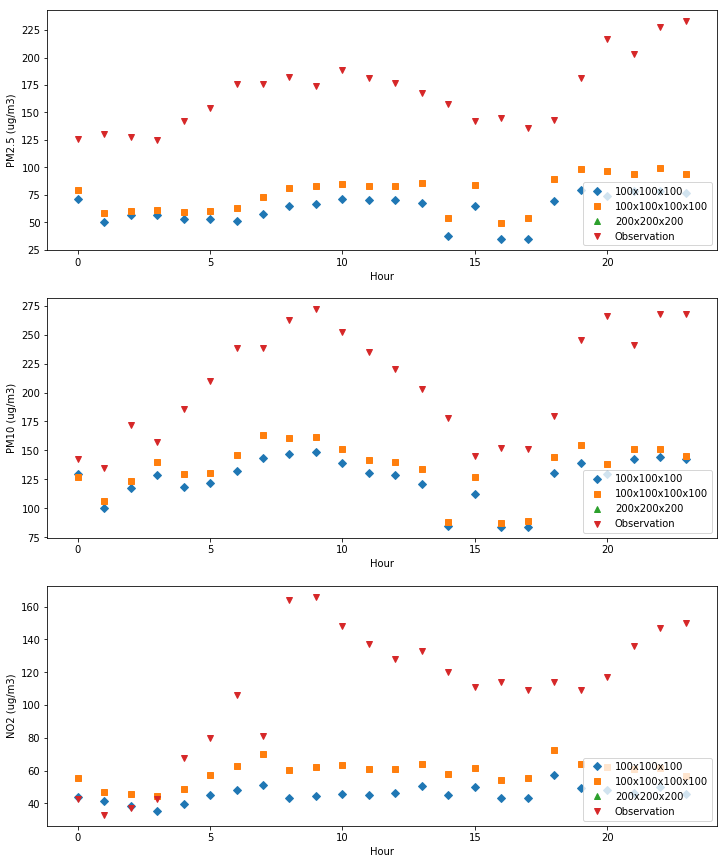

In [19]:
groups = [0,1,2]
list1=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
i = 1
# plot each column
plt.figure(figsize=(12,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(prediction3_100[group], 'D', label='100x100x100')
    plt.plot(prediction4_100[group], 's', label='100x100x100x100')
    plt.plot(prediction3_200[group], '^', label='200x200x200')
    #plt.plot(predictions4_50[group], 'H', label='400x200x100x50')
    plt.plot(test_y[:,group], 'v', label='Observation')
    plt.xlabel('Hour')
    plt.ylabel(list1[i-1])
    plt.legend(loc='lower right')
    
    i += 1
plt.show()

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset

values = cd_final.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

reframed = series_to_supervised(values, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,-0.278419,0.136278,0.210122,0.274843,-0.085349,399.0,472.0,136.0,-0.279200,0.140354,0.214408,0.314243,-0.061718,397.0,485.0,126.0
2,-0.279200,0.140354,0.214408,0.314243,-0.061718,397.0,485.0,126.0,-0.280406,0.148505,0.153795,0.369498,0.006551,438.0,485.0,127.0
3,-0.280406,0.148505,0.153795,0.369498,0.006551,438.0,485.0,127.0,-0.291827,0.159620,0.164871,0.351648,0.006790,409.0,415.0,120.0
4,-0.291827,0.159620,0.164871,0.351648,0.006790,409.0,415.0,120.0,-0.268842,0.167475,0.258597,0.099674,0.016974,267.0,281.0,127.0
5,-0.268842,0.167475,0.258597,0.099674,0.016974,267.0,281.0,127.0,-0.276788,0.139020,0.277297,0.100732,0.020793,387.0,404.0,153.0
6,-0.276788,0.139020,0.277297,0.100732,0.020793,387.0,404.0,153.0,-0.303958,0.116864,0.306086,0.083388,-0.115028,416.0,433.0,146.0
7,-0.303958,0.116864,0.306086,0.083388,-0.115028,416.0,433.0,146.0,-0.266856,0.107305,0.237698,0.103935,-0.152186,278.0,304.0,116.0
8,-0.266856,0.107305,0.237698,0.103935,-0.152186,278.0,304.0,116.0,-0.132278,0.099598,0.001201,0.046114,-0.149162,320.0,324.0,153.0
9,-0.132278,0.099598,0.001201,0.046114,-0.149162,320.0,324.0,153.0,-0.281257,0.239576,0.369430,-0.474120,-0.019547,215.0,250.0,120.0
10,-0.281257,0.239576,0.369430,-0.474120,-0.019547,215.0,250.0,120.0,-0.260896,0.281517,0.344093,-0.520881,-0.035461,251.0,256.0,117.0


In [18]:
values = reframed.values
n_train_hours = 8441-24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :8], train[:, 13:]
test_X, test_y = test[:, :8], test[:, 13:]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8417, 8) (8417, 3) (24, 8) (24, 3)


In [19]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression().fit(train_X, train_y)
print(lr1.score(train_X, train_y))
print(lr1.score(test_X, test_y))
lr1_predict=lr1.predict(test_X)



from sklearn.neural_network import MLPRegressor
mlp1=MLPRegressor(solver='lbfgs', hidden_layer_sizes=[400,200,100], random_state=0).fit(train_X,train_y)
print(mlp1.score(train_X, train_y))
print(mlp1.score(test_X, test_y))
mlp1_predict=mlp1.predict(test_X)

0.8309707766582153
0.692191206683501
0.8341164751607649
0.6975079407327077


In [20]:
#10- nearset neighbor
from sklearn.neighbors import KNeighborsRegressor
knn10=KNeighborsRegressor(n_neighbors=10).fit(train_X, train_y)
knn10_predict=knn10.predict(test_X)
print(knn10.score(train_X, train_y))
print(knn10.score(test_X, test_y))

0.8486896051349577
0.6222555863819693


In [21]:
#5- nearset neighbor
from sklearn.neighbors import KNeighborsRegressor
knn5=KNeighborsRegressor(n_neighbors=5).fit(train_X, train_y)
knn5_predict=knn5.predict(test_X)
print(knn5.score(train_X, train_y))
print(knn5.score(test_X, test_y))

0.8670610010966182
0.6144708158356768


In [22]:
#15- nearset neighbor
from sklearn.neighbors import KNeighborsRegressor
knn15=KNeighborsRegressor(n_neighbors=15).fit(train_X, train_y)
knn15_predict=knn15.predict(test_X)
print(knn15.score(train_X, train_y))
print(knn15.score(test_X, test_y))

0.8427797084790375
0.6377413270597176


In [40]:
1-np.sum(test_y[:,0]-lr1_predict[:,0])/np.sum(test_y[:,0])

0.9254870787262917

In [41]:
1-np.sum(test_y[:,0]-knn15_predict[:,0])/np.sum(test_y[:,0])

0.936372697353363

In [42]:
1-np.sum(test_y[:,0]-knn10_predict[:,0])/np.sum(test_y[:,0])

0.9384404607117176

In [43]:
1-np.sum(test_y[:,0]-knn5_predict[:,0])/np.sum(test_y[:,0])

0.9340308979153633

No handles with labels found to put in legend.


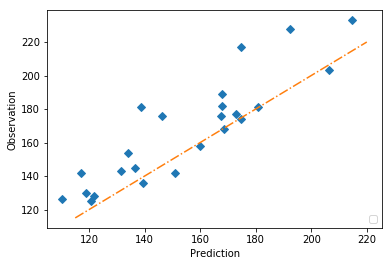

In [27]:
plt.figure()
x1=np.linspace(115,220,20)
y1=x1
#plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
plt.plot(lr1_predict[:,0],test_y[:,0], 'D')
plt.plot(x1,y1, '-.')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.legend(loc='lower right')

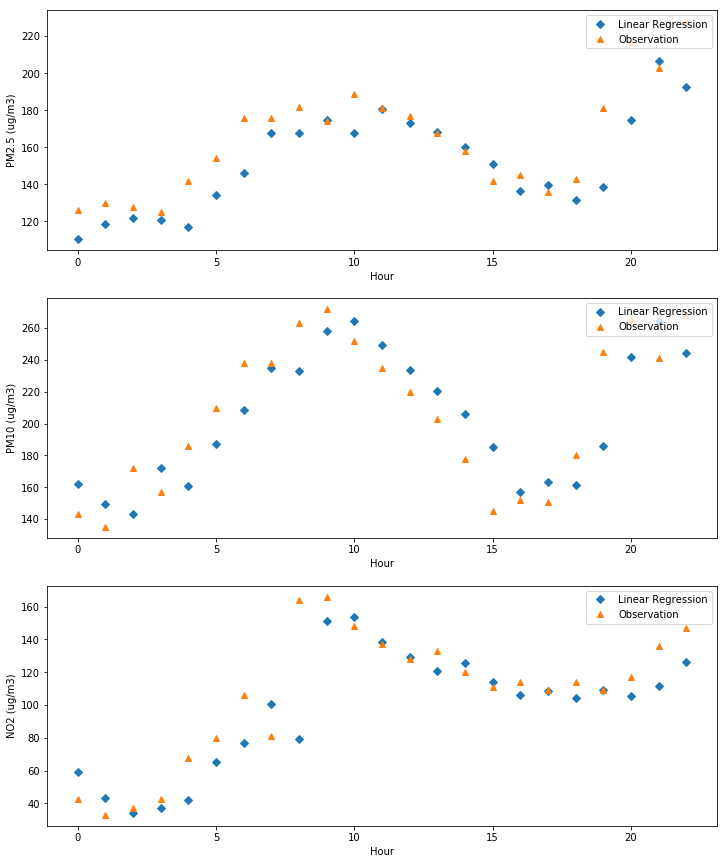

In [29]:
groups = [0,1,2]
list1=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
i = 1
# plot each column
plt.figure(figsize=(12,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    #plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
    plt.plot(lr1_predict[-25:-1,group], 'D', label='Linear Regression')
    #plt.plot(lr1_predict[-25:-1,group], 'o', label='10-Nearest Neighbour')
    #plt.plot(lr1_predict[-25:-1,group], 's', label='5-Nearest Neighbour')
    #plt.plot(lr1_predict[-25:-1,group], 's', label='Linear Regression')
    plt.plot(test_y[-25:-1,group], '^', label='Observation')
    plt.xlabel('Hour')
    plt.ylabel(list1[i-1])
    plt.legend(loc='upper right')
    
    i += 1
plt.show()

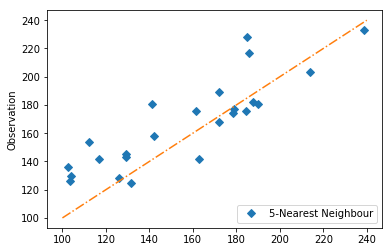

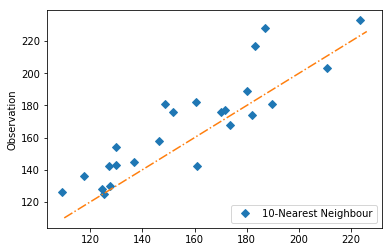

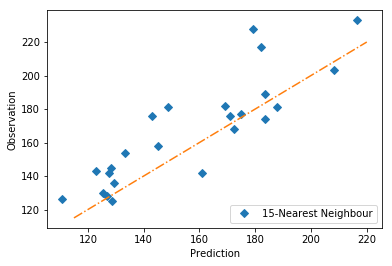

In [38]:
plt.figure()
x1=np.linspace(100,240,20)
y1=x1
#plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
plt.plot(knn5_predict[:,0],test_y[:,0], 'D',label='5-Nearest Neighbour')
plt.plot(x1,y1, '-.')
#plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.legend(loc='lower right')



plt.figure()
x1=np.linspace(110,226,20)
y1=x1
#plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
plt.plot(knn10_predict[:,0],test_y[:,0], 'D',label='10-Nearest Neighbour')
plt.plot(x1,y1, '-.')
#plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.legend(loc='lower right')


plt.figure()
x1=np.linspace(115,220,20)
y1=x1
#plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
plt.plot(knn15_predict[:,0],test_y[:,0], 'D',label='15-Nearest Neighbour')
plt.plot(x1,y1, '-.')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.legend(loc='lower right')



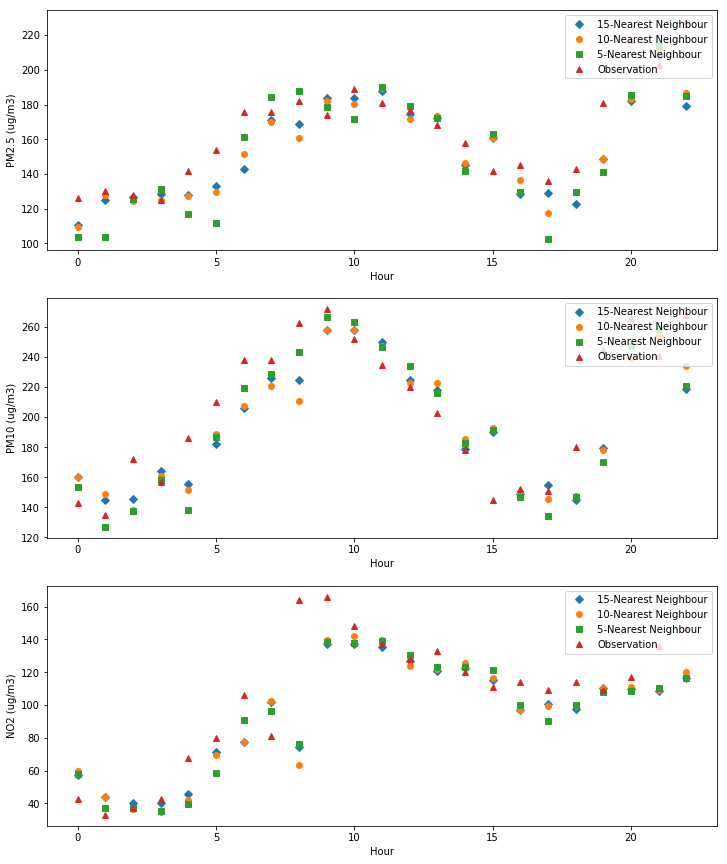

In [28]:
groups = [0,1,2]
list1=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
i = 1
# plot each column
plt.figure(figsize=(12,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    #plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
    plt.plot(knn15_predict[-25:-1,group], 'D', label='15-Nearest Neighbour')
    plt.plot(knn10_predict[-25:-1,group], 'o', label='10-Nearest Neighbour')
    plt.plot(knn5_predict[-25:-1,group], 's', label='5-Nearest Neighbour')
    #plt.plot(lr1_predict[-25:-1,group], 's', label='Linear Regression')
    plt.plot(test_y[-25:-1,group], '^', label='Observation')
    plt.xlabel('Hour')
    plt.ylabel(list1[i-1])
    plt.legend(loc='upper right')
    
    i += 1
plt.show()

In [44]:
values = reframed.values
n_train_hours =len(reframed)-24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :8], train[:, 13:]
test_X, test_y = test[:, :8], test[:, 13:]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


import tensorflow as tf 
df_train_X=pd.DataFrame(train_X,columns=['temperature', 'pressure', 'humidity', 'wind_direction',
       'wind_speed/kph', 'PM2.5', 'PM10', 'NO2'])
df_train_y=pd.DataFrame(train_y,columns=['PM2.5_Con','PM10_Con', 'NO2_Con'])
df_test_X=pd.DataFrame(test_X,columns=['temperature', 'pressure', 'humidity', 'wind_direction',
       'wind_speed/kph', 'PM2.5', 'PM10', 'NO2'])
df_test_y=pd.DataFrame(test_y,columns=['PM2.5_Con','PM10_Con', 'NO2_Con'])
LABELS=['PM2.5_Con', 'PM10_Con', 'NO2_Con']
df_train=pd.concat([df_train_X,df_train_y],axis=1)
df_test=pd.concat([df_test_X,df_test_y],axis=1)
col_train = list(df_train_X.columns)
col_train_bis = list(df_train_X.columns)


COLUMNS = col_train
FEATURES = col_train_bis

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

training_set = df_train
testing_set = df_test
prediction_set = df_train_y

#p3_100,p4_100,p3_200 = [[0]*24]*3
prediction3_100,prediction4_100,prediction3_200=(),(),()
# Model Hidden Layer: 100,100,100

for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[100,100,100])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    y = regressor.predict(input_fn=lambda: input_fn(testing_set))
    a=list(itertools.islice(y, testing_set.shape[0]))
    prediction3_100+=(a,)
    
    
# Model Hidden Layer: 100,100,100,100


for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[100,100,100,100])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    y = regressor.predict(input_fn=lambda: input_fn(testing_set))
    a=(list(itertools.islice(y, testing_set.shape[0])))
    prediction4_100+=(a,)
    
# Model Hidden Layer: 200,200,200

for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[200,200,200])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    a=(list(itertools.islice(y, testing_set.shape[0])))
    prediction3_200+=(a,)

(8417, 8) (8417, 3) (24, 8) (24, 3)


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
Final Loss on the testing set: 308.312317
Final Loss on the testing set: 579.558838
Final Loss on the testing set: 470.385345
Final Loss on the testing set: 322.022217
Final Loss on the testing set: 723.270325
Final Loss on the testing set: 459.698151
Final Loss on the testing set: 274.744781
Final Loss on the testing set: 574.363586
Final Loss on the testing set: 511.121246


In [58]:
values = reframed.values
n_train_hours =len(reframed)-24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :8], train[:, 13:]
test_X, test_y = test[:, :8], test[:, 13:]
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


import tensorflow as tf 
df_train_X=pd.DataFrame(train_X,columns=['temperature', 'pressure', 'humidity', 'wind_direction',
       'wind_speed/kph', 'PM2.5', 'PM10', 'NO2'])
df_train_y=pd.DataFrame(train_y,columns=['PM2.5_Con','PM10_Con', 'NO2_Con'])
df_test_X=pd.DataFrame(test_X,columns=['temperature', 'pressure', 'humidity', 'wind_direction',
       'wind_speed/kph', 'PM2.5', 'PM10', 'NO2'])
df_test_y=pd.DataFrame(test_y,columns=['PM2.5_Con','PM10_Con', 'NO2_Con'])
LABELS=['PM2.5_Con', 'PM10_Con', 'NO2_Con']
df_train=pd.concat([df_train_X,df_train_y],axis=1)
df_test=pd.concat([df_test_X,df_test_y],axis=1)
col_train = list(df_train_X.columns)
col_train_bis = list(df_train_X.columns)


COLUMNS = col_train
FEATURES = col_train_bis

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

training_set = df_train
testing_set = df_test
prediction_set = df_train_y

#p3_100,p4_100,p3_200 = [[0]*24]*3

# Model Hidden Layer:

for LABEL in LABELS:
    
    tf.logging.set_verbosity(tf.logging.ERROR)
    regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                              activation_fn = tf.nn.relu, hidden_units=[200,200,200])#,
                                             #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))
    # Reset the index of training
    training_set.reset_index(drop = True, inplace =True)

    def input_fn(data_set, pred = False):
    
        if pred == False:
        
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
            labels = tf.constant(data_set[LABEL].values)
        
            return feature_cols, labels

        if pred == True:
            feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
            return feature_cols

    regressor.fit(input_fn=lambda: input_fn(training_set), steps=1000)

# Evaluation on the test set created by train_test_split
    ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

    # Display the score on the testing set
    # 0.002X in average
    loss_score1 = ev["loss"]
    print("Final Loss on the testing set: {0:f}".format(loss_score1))

# Predictions
    import itertools
    y = regressor.predict(input_fn=lambda: input_fn(testing_set))
    a=list(itertools.islice(y, testing_set.shape[0]))
    prediction3_200+=(a,)
    
  

(8417, 8) (8417, 3) (24, 8) (24, 3)
Final Loss on the testing set: 254.268112
Final Loss on the testing set: 573.702698
Final Loss on the testing set: 465.319244


In [53]:
1-np.sum(test_y[:,0]-prediction3_100[0])/np.sum(test_y[:,0])

0.9354906752705574

In [61]:
1-np.sum(test_y[:,0]-prediction4_100[0])/np.sum(test_y[:,0])

0.9328350946307182

In [62]:
1-np.sum(test_y[:,0]-prediction3_200[3])/np.sum(test_y[:,0])

0.954812116920948

No handles with labels found to put in legend.


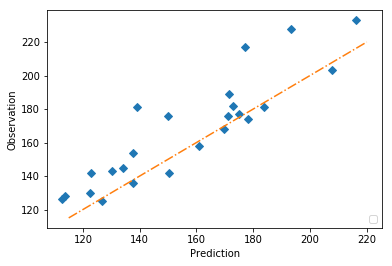

In [54]:
plt.figure()
x1=np.linspace(115,220,20)
y1=x1
#plt.plot(mlp1_predict[-25:-1,group], '--',label='Neural Net')
plt.plot(prediction3_100[0],test_y[:,0], 'D')
plt.plot(x1,y1, '-.')
plt.xlabel('Prediction')
plt.ylabel('Observation')
plt.legend(loc='lower right')


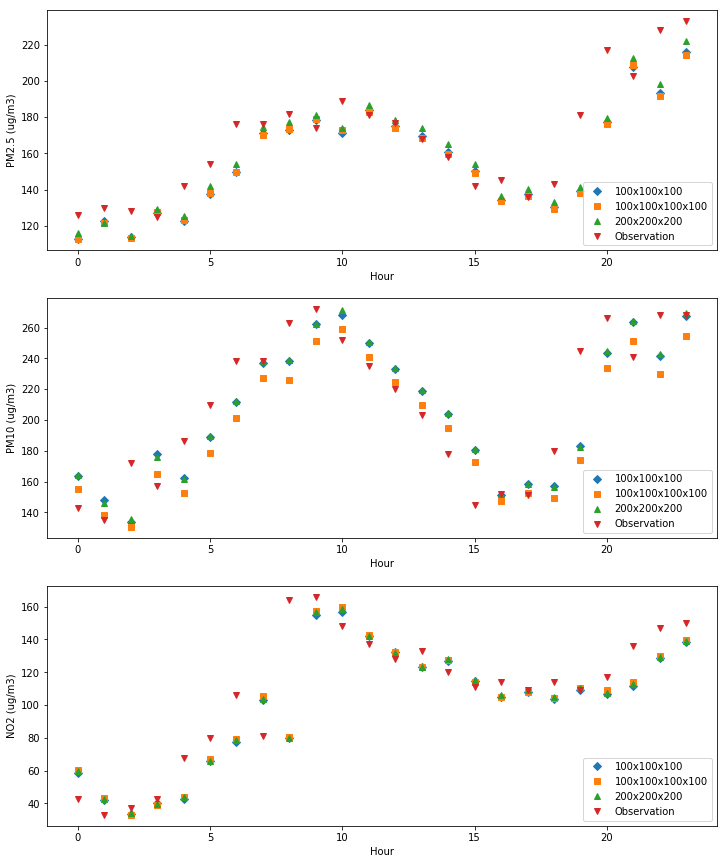

In [60]:
groups = [0,1,2]
list1=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
i = 1
# plot each column
plt.figure(figsize=(12,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(prediction3_100[group], 'D', label='100x100x100')
    plt.plot(prediction4_100[group], 's', label='100x100x100x100')
    plt.plot(prediction3_200[group+3], '^', label='200x200x200')
    #plt.plot(predictions4_50[group], 'H', label='400x200x100x50')
    plt.plot(test_y[:,group], 'v', label='Observation')
    plt.xlabel('Hour')
    plt.ylabel(list1[i-1])
    plt.legend(loc='lower right')
    
    i += 1
plt.show()

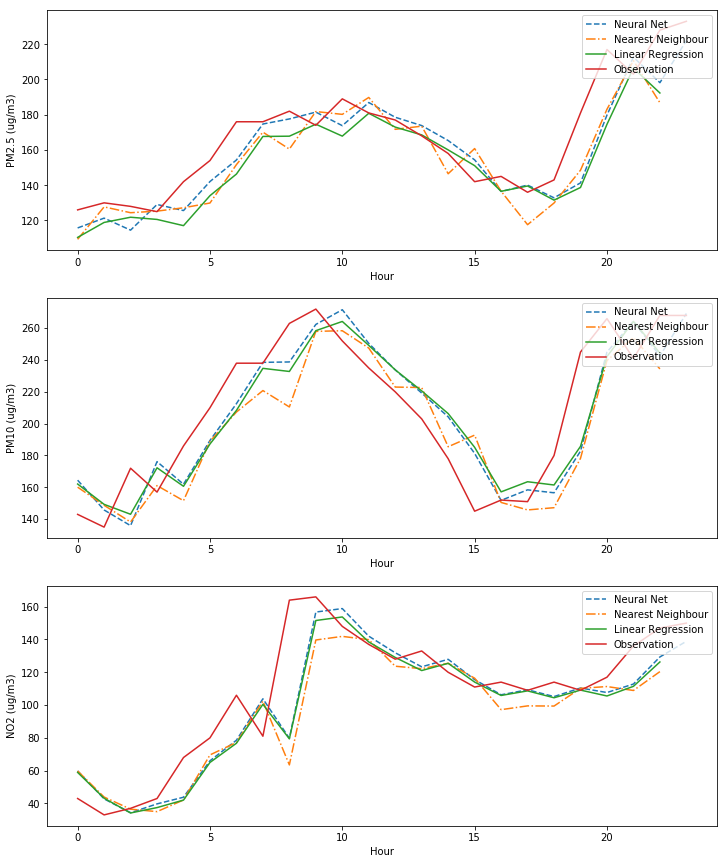

In [63]:
groups = [0,1,2]
list1=['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']
i = 1
# plot each column
plt.figure(figsize=(12,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(prediction3_200[group+3], '--',label='Neural Net')
    plt.plot(knn10_predict[-25:-1,group], '-.', label='Nearest Neighbour')
    plt.plot(lr1_predict[-25:-1,group], '-', label='Linear Regression')
    plt.plot(test_y[:,group], '-', label='Observation')
    plt.xlabel('Hour')
    plt.ylabel(list1[i-1])
    plt.legend(loc='upper right')
    
    i += 1
plt.show()